In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#!pip install folium

  Installing build dependencies: started

    ERROR: Command errored out with exit status 1:
     command: 'c:\python_3_8_8\python.exe' 'c:\python_3_8_8\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\도연\AppData\Local\Temp\tmpgqbvo__9'
         cwd: C:\Users\도연\AppData\Local\Temp\pip-install-l6_tvqox\folium_577378aef98b4dfcb6305433b199d2c4
    Complete output (22 lines):
    Error in sitecustomize; set PYTHONVERBOSE for traceback:
    SyntaxError: (unicode error) 'utf-8' codec can't decode byte 0xb5 in position 0: invalid start byte (sitecustomize.py, line 21)
    c:\python_3_8_8\lib\distutils\dist.py:274: UserWarning: Unknown distribution option: 'use_scm_version'
      warnings.warn(msg)
    c:\python_3_8_8\lib\site-packages\setuptools\dist.py:710: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
      warnings.warn(
    running dist_info
    creating C:\Users\\


  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'error'
  Using cached MarkupSafe-2.0.1-cp38-cp38-win_amd64.whl (14 kB)


In [4]:
fName = "부산교통공사_시간대별 승하차인원_10_01_2021.csv"
dfMetro = pd.read_csv(fName,encoding="cp949")
dfMetro.head(2)

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2021-01-01,승차,2323,0,0,1,4,24,...,308,272,237,132,59,53,55,20,7,0
1,95,다대포해수욕장,2021-01-01,하차,2010,0,0,1,1,26,...,199,160,158,76,71,41,57,34,21,13


In [5]:
dfMetro.tail(2)

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
61150,414,안 평,2021-09-30,승차,1971,0,0,0,3,41,...,138,166,159,150,51,24,27,5,3,0
61151,414,안 평,2021-09-30,하차,1921,0,0,0,1,3,...,132,144,198,176,124,69,54,54,32,7


In [7]:
# 필요한 데이터만 추출
# idx[0], 역번호[1], 역명[2], 년월일[3], 구분[4], 합계[5]
dfMetro = dfMetro.iloc[:,0:5]
dfMetro.head(2)

,역번호,역명,년월일,구분,합계
0,95,다대포해수욕장,2021-01-01,승차,2323
1,95,다대포해수욕장,2021-01-01,하차,2010


In [8]:
dfMetro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61152 entries, 0 to 61151
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   역번호     61152 non-null  int64 
 1   역명      61152 non-null  object
 2   년월일     61152 non-null  object
 3   구분      61152 non-null  object
 4   합계      61152 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


# 데이터 확인

In [9]:
dfMetro["년월일"]

0        2021-01-01
1        2021-01-01
2        2021-01-02
3        2021-01-02
4        2021-01-03
            ...    
61147    2021-09-28
61148    2021-09-29
61149    2021-09-29
61150    2021-09-30
61151    2021-09-30
Name: 년월일, Length: 61152, dtype: object

In [12]:
len(sorted(list(set(dfMetro["역명"]))))

112

# 2021년 승하차 인원 합계만 추출

In [14]:
# 년얼일[2021-11-01] -> 년[2021]
dfMetro['년'] = dfMetro["년월일"].str.slice(0,4)
dfMetro["년"]

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
61147    2021
61148    2021
61149    2021
61150    2021
61151    2021
Name: 년, Length: 61152, dtype: object

In [15]:
# 평균 승차 인원 계산
# 승차 인원 컬럼만 추출
dfGetOn = dfMetro[dfMetro["구분"] =="승차"]
dfGetOn.head(5)

,역번호,역명,년월일,구분,합계,년
0,95,다대포해수욕장,2021-01-01,승차,2323,2021
2,95,다대포해수욕장,2021-01-02,승차,2901,2021
4,95,다대포해수욕장,2021-01-03,승차,2268,2021
6,95,다대포해수욕장,2021-01-04,승차,3527,2021
8,95,다대포해수욕장,2021-01-05,승차,3421,2021


In [16]:
dfGetOn = dfGetOn.drop(["년월일","구분"], axis=1)
dfGetOn.head(2)

,역번호,역명,합계,년
0,95,다대포해수욕장,2323,2021
2,95,다대포해수욕장,2901,2021


In [18]:
dfGetOn = dfGetOn.groupby(["역번호","역명","년"])["합계"].mean().round(0)
dfGetOn.head(2)

역번호  역명       년   
95   다대포해수욕장  2021    4184.0
96   다대포항     2021    2832.0
Name: 합계, dtype: float64

In [21]:
# 데이터 프레임으로 변환
dfGetOn = pd.DataFrame(dfGetOn)
dfGetOn = dfGetOn.reset_index()
dfGetOn.rename(columns={"합계":"평균 승차 합계"}, inplace=True)
dfGetOn.set_index("역번호", inplace=True)
dfGetOn.head(2)

,index,역명,년,평균 승차 합계
역번호,,,,
95,0,다대포해수욕장,2021,4184.0
96,1,다대포항,2021,2832.0


In [22]:
# 전체 평균 승차
mtrMean = dfGetOn["평균 승차 합계"].mean().round(1) # round 소수점 첫째자리까지 표시
print("평균 승차 합계의 평균 =",mtrMean)

평균 승차 합계의 평균 = 6012.9


In [23]:
plt.rc('font',family="HYGothic-Medium")

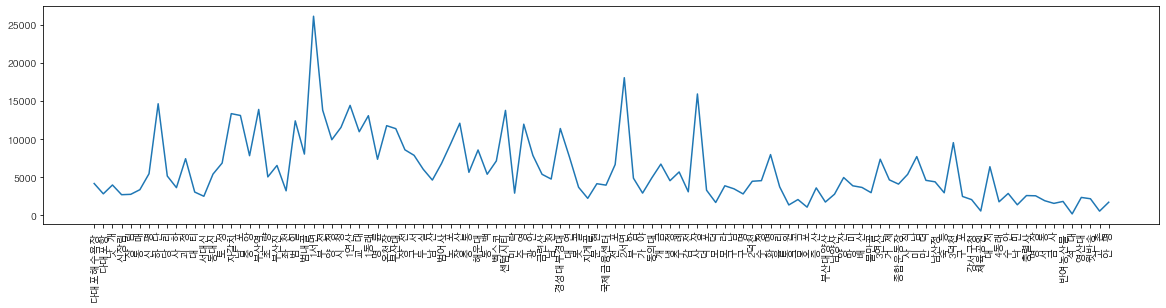

In [24]:
plt.figure(figsize=(20,4))
plt.plot(dfGetOn["역명"],dfGetOn["평균 승차 합계"])
plt.xticks(rotation=90)
plt.show()

In [30]:
# 평균보다 많이 이용하는 TOP10 따로 저장
dfGetOnTop = dfGetOn[dfGetOn["평균 승차 합계"] > mtrMean]
dfGetOnTop = dfGetOnTop.sort_values(by = "평균 승차 합계", ascending=False)
dfGetOnTop = dfGetOnTop.head(10)
dfGetOnTop


,index,역명,년,평균 승차 합계
역번호,,,,
119,24,1서면,2021,26122.0
219,58,2서면,2021,18063.0
227,66,사 상,2021,15929.0
102,7,하 단,2021,14644.0
123,28,1연산,2021,14431.0
113,18,부산역,2021,13898.0
120,25,부 전,2021,13803.0
206,45,센텀시티,2021,13773.0
110,15,자갈치,2021,13348.0


# 지하철역 위치 정보 확인

In [28]:
fName = "부산교통공사_도시철도역사정보_20210915.csv"
dfPos = pd.read_csv(fName, encoding="utf-16",sep="\t")
dfPos.head(2)

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,95,다대포해수욕장,S2601,부산도시철도 1호선,Dadaepo Beach,多大浦海水浴場,일반역,NaN,NaN,35.04867,128.9641,부산교통공사,부산광역시 사하구 다대로 지하 692,051-678-6195,2021-02-26
1,96,다대포항역,S2601,부산도시철도 1호선,Dadaepo Harbor,多大浦港,일반역,NaN,NaN,35.05782,128.9713,부산교통공사,부산광역시 사하구 다대로 지하 548,051-678-6196,2021-02-26


In [29]:
# 필요한 열만 추출
dfPos = dfPos[["역번호","역사명","노선명","역위도","역경도"]]
dfPos.set_index("역번호", inplace=True)
dfPos.head(2)

,역사명,노선명,역위도,역경도
역번호,,,,
95,다대포해수욕장,부산도시철도 1호선,35.04867,128.9641
96,다대포항역,부산도시철도 1호선,35.05782,128.9713


# 두 데이터프레임 합치기

In [32]:
# 인덱스 맞춰주고 합치기
dfMM = dfGetOnTop.merge(dfPos, how='outer',on="역번호")
dfMM.head(2)


,index,역명,년,평균 승차 합계,역사명,노선명,역위도,역경도
역번호,,,,,,,,
119,24.0,1서면,2021,26122.0,서면역(1호선),부산도시철도 1호선,35.158282,129.059556
219,58.0,2서면,2021,18063.0,서면역(2호선),부산도시철도 2호선,35.157740,129.059084


In [35]:
# 필요없는 열 삭제
dfMM.drop(["역명","노선명"], axis=1, inplace=True)


In [33]:
dfMM.tail(2)

,index,역명,년,평균 승차 합계,역사명,노선명,역위도,역경도
역번호,,,,,,,,
413,NaN,NaN,NaN,NaN,고촌역,부산도시철도 4호선,35.236031,129.160444
414,NaN,NaN,NaN,NaN,안평역,부산도시철도 4호선,35.237363,129.171823


In [34]:
# 결측치 데이터 삭제
dfMM.dropna(inplace=True)
dfMM.tail(2)

,index,역명,년,평균 승차 합계,역사명,노선명,역위도,역경도
역번호,,,,,,,,
110,15.0,자갈치,2021,13348.0,자갈치역,부산도시철도 1호선,35.097372,129.026670
111,16.0,남 포,2021,13106.0,남포역,부산도시철도 1호선,35.097953,129.034869


# 데이터 시각화

In [36]:
import seaborn as sns

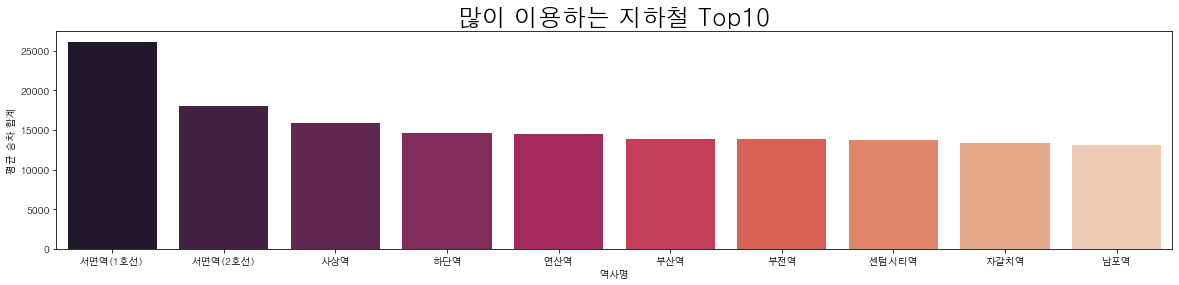

In [38]:
plt.figure(figsize=(20,4))
plt.title("많이 이용하는 지하철 Top10",fontsize=24)
sns.barplot(x="역사명",y="평균 승차 합계", data=dfMM, palette="rocket")
plt.show()


In [39]:
import folium

In [41]:
# 위치 보기
map = folium.Map(location=[35.105797880459185, 129.00286128018175],
zoom_start=12, titles="많이 이용하는 지하철Top10")
folium.Marker([35.105797880459185, 129.00286128018175]).add_to(map)
map 

In [47]:
map = folium.Map(location=[35.105797880459185, 129.00286128018175],
zoom_start=12, titles="많이 이용하는 지하철Top10")
for mtrNo in dfMM.index:
    lat = dfMM.loc[mtrNo,"역위도"]
    lng = dfMM.loc[mtrNo,"역경도"]
    mName = dfMM.loc[mtrNo,"역사명"]
    folium.CircleMarker([lat,lng],
    color="blue",fill=True,
    radius=dfMM.loc[mtrNo,"평균 승차 합계"]/mtrMean*10,
    tooltip=mName).add_to(map)
    folium.Marker([lat,lng],tooltip=mName).add_to(map)
map 